Value(data=-20.0)


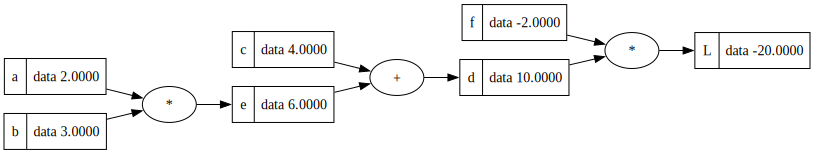

In [1]:
from micrograd import Value
import utils as U

a = Value(2.0, label = "a")
b = Value(3.0, label = "b")
c = Value(4.0, label = "c")
e = a*b; e.label = "e"
d = e + c; d.label = "d"


f = Value(-2.0, label = "f")
L = d*f; L.label = "L"

print(L)

L.visualize()

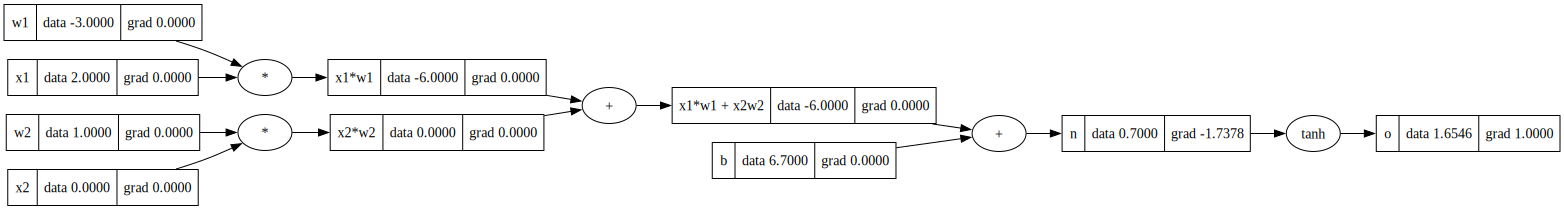

In [3]:
from micrograd import Value
import utils as U

x1 = Value(2.0, label="x1")
x2 = Value(0.0, label="x2")

w1 = Value(-3.0, label="w1")
w2 = Value(1.0, label="w2")

b = Value(6.7, label="b")

x1w1 = x1*w1; x1w1.label = "x1*w1"
x2w2 = x2 * w2; x2w2.label="x2*w2"

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = "x1*w1 + x2w2"
n = x1w1x2w2 + b; n.label = "n"

o = n.tanh(); o.label = "o"
o.grad = 1.0
o._backward()
o.visualize()

In [39]:
# chetana OA
def fun(S):
    moves = 0
    i = 0
    while i < len(S) - 2:
        if S[i] == S[i + 1] == S[i + 2]:
            moves += 1
            i += 3 
        else:
            i += 1
    return moves

def solution(S):
    l = len(S)

    mp = {
        0 : 0,
        1 : 0,
        2 : 0,
        3 : 1,
        4 : 1,
        5 : 1,
    }

    def fill(l):
        ans = 0

        while l >= 3:
            if l in mp:
                ans += mp[l]
                break

            t = l // 2
             
            if t not in mp:
                mp[t] = fill(t//2) + fill(t - t//2 + 1)
            ans += mp[t]
            l = l - t + 1
  
        return ans   
     
    out = 0
    count = 0
    for i in range(l-1):
        if S[i] == S[i+1]:
            if count == 0:
                count += 1
            count += 1
        else:
            out += fill(count)
            count = 0

    if count != 0:
        out += fill(count)

    return out

from time import time
ans1 = []
ans2 = []

start = time()
for i in range(10000):
    s = "a" * i + "bb" + "a" * i + "bbbb" + "baab" * i
    ans1.append(fun(s))
print("satvik : ", time() - start)

start = time()
for i in range(10000):
    s = "a" * i + "bb" + "a" * i + "bbbb" + "baab" * i
    ans2.append(solution(s))  
print("aditya : ", time() - start)

for i in range(len(ans1)):
    if ans1[i] != ans2[i]:
        print("a" * i + "bb" + "a" * i, ans1[i], ans2[i])

        break


# S = "baaaaabaaaaa"
# # S = "baaabbaabbba"
# # S = "baabab"
# S = "aaaaaaaaaaaabaaaaaaaaaaaa"
# # S = "aaaaaaaaaaaab"
# S = "abababababababababab"
# S = "aaabbaaa"
# S = "aaaa"
# solution(S)




satvik :  27.997371196746826
aditya :  26.435216188430786
